# CS109a Final Project: Group 90 <br>Predicting damage of US storms<br>
### Data Science 1: CS 109A/STAT 121A/AC 209A/ E 109A <br> Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave
#### Harvard University <br> Fall 2017 <br> 
#### Date: December 7, 2017<br> Written By: George Hu, Manav Khandelwal, Josh Kuppersmith Evan Mackay <br> 

---




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# from zipcode
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time
import copy
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor

# Part 1: Loading In Data

In [2]:
# load in all data for 2016 and 2017

# Data source: https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/

details_2016 = pd.read_csv('Details_2016.csv')
details_2017 = pd.read_csv('Details_2017.csv')
locations_2016 = pd.read_csv('Locations_2016.csv')
locations_2017 = pd.read_csv('Locations_2017.csv')
# Fatalities data were initially considered, but we decided to focus on monetary damage
#fatalities_2016 = pd.read_csv('Fatalities_2016.csv')
#fatalities_2017 = pd.read_csv('Fatalities_2017.csv')

details_2016.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201607,15,1715,201607,15,1715,108769,651823,SOUTH CAROLINA,45,2016,July,Heavy Rain,C,91,YORK,GSP,15-JUL-16 17:15:00,EST-5,15-JUL-16 17:15:00,0,0,0,0,2.00K,0.00K,Social Media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,BOYD HILL,1.0,N,BOYD HILL,34.94,-81.03,34.94,-81.03,Scattered thunderstorms developed across the U...,One to two feet of deep standing water develop...,CSV
1,201607,15,1725,201607,15,1725,108769,651825,SOUTH CAROLINA,45,2016,July,Thunderstorm Wind,C,91,YORK,GSP,15-JUL-16 17:25:00,EST-5,15-JUL-16 17:25:00,0,0,0,0,0.00K,0.00K,NWS Employee,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,S,FT MILL,1.0,S,FT MILL,35.01,-80.93,35.01,-80.93,Scattered thunderstorms developed across the U...,NWS Columbia relayed a report of trees blown d...,CSV
2,201607,16,1246,201607,16,1246,108812,651828,NORTH CAROLINA,37,2016,July,Thunderstorm Wind,C,111,MCDOWELL,GSP,16-JUL-16 12:46:00,EST-5,16-JUL-16 12:46:00,0,0,0,0,0.00K,0.00K,Broadcast Media,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,ENE,OLD FT,2.0,ENE,OLD FT,35.64,-82.14,35.64,-82.14,Scattered thunderstorms developed near the Blu...,Media reported two trees blown down along I-40...,CSV
3,201607,8,1755,201607,8,1755,105872,635287,TENNESSEE,47,2016,July,Thunderstorm Wind,C,105,LOUDON,MRX,08-JUL-16 17:55:00,EST-5,08-JUL-16 17:55:00,0,0,0,0,NaN,NaN,Public,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,JENA,1.0,W,JENA,35.65,-84.18,35.65,-84.18,The combination of summer heating and high low...,Numerous trees were reported down in the Green...,CSV
4,201607,8,1810,201607,8,1810,105872,635296,TENNESSEE,47,2016,July,Thunderstorm Wind,C,155,SEVIER,MRX,08-JUL-16 18:10:00,EST-5,08-JUL-16 18:10:00,0,0,0,0,NaN,NaN,State Official,60.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,WSW,PITNER,1.0,WSW,PITNER,35.87,-83.77,35.87,-83.77,The combination of summer heating and high low...,Numerous trees were reported down in Seymour. ...,CSV


In [3]:
# vertically merge 2016 and 2017 data together

details = pd.concat([details_2016, details_2017])
locations = pd.concat([locations_2016, locations_2017])
#fatalities = pd.concat([fatalities_2016, fatalities_2017])

print(details.shape)

details.head()

(103177, 51)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201607,15,1715,201607,15,1715,108769,651823,SOUTH CAROLINA,45,2016,July,Heavy Rain,C,91,YORK,GSP,15-JUL-16 17:15:00,EST-5,15-JUL-16 17:15:00,0,0,0,0,2.00K,0.00K,Social Media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,BOYD HILL,1.0,N,BOYD HILL,34.94,-81.03,34.94,-81.03,Scattered thunderstorms developed across the U...,One to two feet of deep standing water develop...,CSV
1,201607,15,1725,201607,15,1725,108769,651825,SOUTH CAROLINA,45,2016,July,Thunderstorm Wind,C,91,YORK,GSP,15-JUL-16 17:25:00,EST-5,15-JUL-16 17:25:00,0,0,0,0,0.00K,0.00K,NWS Employee,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,S,FT MILL,1.0,S,FT MILL,35.01,-80.93,35.01,-80.93,Scattered thunderstorms developed across the U...,NWS Columbia relayed a report of trees blown d...,CSV
2,201607,16,1246,201607,16,1246,108812,651828,NORTH CAROLINA,37,2016,July,Thunderstorm Wind,C,111,MCDOWELL,GSP,16-JUL-16 12:46:00,EST-5,16-JUL-16 12:46:00,0,0,0,0,0.00K,0.00K,Broadcast Media,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,ENE,OLD FT,2.0,ENE,OLD FT,35.64,-82.14,35.64,-82.14,Scattered thunderstorms developed near the Blu...,Media reported two trees blown down along I-40...,CSV
3,201607,8,1755,201607,8,1755,105872,635287,TENNESSEE,47,2016,July,Thunderstorm Wind,C,105,LOUDON,MRX,08-JUL-16 17:55:00,EST-5,08-JUL-16 17:55:00,0,0,0,0,NaN,NaN,Public,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,JENA,1.0,W,JENA,35.65,-84.18,35.65,-84.18,The combination of summer heating and high low...,Numerous trees were reported down in the Green...,CSV
4,201607,8,1810,201607,8,1810,105872,635296,TENNESSEE,47,2016,July,Thunderstorm Wind,C,155,SEVIER,MRX,08-JUL-16 18:10:00,EST-5,08-JUL-16 18:10:00,0,0,0,0,NaN,NaN,State Official,60.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,WSW,PITNER,1.0,WSW,PITNER,35.87,-83.77,35.87,-83.77,The combination of summer heating and high low...,Numerous trees were reported down in Seymour. ...,CSV


# Part 2: Preliminary Data Analysis and Cleaning

In [4]:
# look at column names

print(list(details.columns))
print()
print(list(locations.columns))
print()

['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE']

['YEARMONTH', 'EPISODE_ID', 'EVENT_ID', 'LOCATION_INDEX', 'RANGE', 'AZIMUTH', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'LAT2', 'LON2']



In [5]:
# merge details and location data

data = pd.merge(details, locations, how='inner', on=['EVENT_ID'])
print(data.shape)
data.head()

# Again, fatalities data were considered but we decided to a deeper dive into monetary damage
## NOTE: possibility to merge on fatalities, but there are very few (766) so this would be a special case model
## perhaps use for some final added analysis
## data = pd.merge(data1, fatalities, how='inner', on=['EVENT_ID'])


(87563, 61)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,YEARMONTH,EPISODE_ID_y,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,201603,15,2316,201603,15,2316,102911,614969,WISCONSIN,55,2016,March,Hail,C,105,ROCK,MKX,15-MAR-16 23:16:00,CST-6,15-MAR-16 23:16:00,0,0,0,0,0.00K,0.00K,Public,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,EDGERTON,1.0,N,EDGERTON,42.8400,-89.0700,42.8400,-89.0700,A deepening low pressure area tracked from Wes...,NaN,CSV,201603,102911,1,0.69,N,EDGERTON,42.8400,-89.0700,4250400,894200
1,201603,15,2239,201603,15,2300,102911,619253,WISCONSIN,55,2016,March,Lightning,C,133,WAUKESHA,MKX,15-MAR-16 22:39:00,CST-6,15-MAR-16 23:00:00,0,0,0,0,1.00K,0.00K,Law Enforcement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NNE,HARTLAND,1.0,NNE,HARTLAND,43.1069,-88.3468,43.1069,-88.3468,A deepening low pressure area tracked from Wes...,Lightning struck a tree and then traveled into...,CSV,201603,102911,1,0.50,NNE,HARTLAND,43.1069,-88.3468,436414,8820808
2,201607,7,2137,201607,7,2137,108811,651842,KANSAS,20,2016,July,Hail,C,109,LOGAN,GLD,07-JUL-16 21:37:00,CST-6,07-JUL-16 21:37:00,0,0,0,0,0.00K,0.00K,Public,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,S,OAKLEY MUNI ARPT,11.0,S,OAKLEY MUNI ARPT,38.9686,-100.8518,38.9686,-100.8518,During the early evening a cold front moved th...,Measured size of the hail was 3.75 inches in d...,CSV,201607,108811,1,10.60,S,OAKLEY MUNI ARPT,38.9686,-100.8518,3858116,10051108
3,201607,7,2013,201607,7,2013,108811,651844,KANSAS,20,2016,July,Thunderstorm Wind,C,193,THOMAS,GLD,07-JUL-16 20:13:00,CST-6,07-JUL-16 20:13:00,0,0,0,0,0.00K,0.00K,Mesonet,52.00,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,E,COLBY,2.0,E,COLBY,39.4001,-101.0130,39.4001,-101.0130,During the early evening a cold front moved th...,Estimated time of report from radar.,CSV,201607,108811,1,1.98,E,COLBY,39.4001,-101.0130,3924006,101780
4,201607,7,2116,201607,7,2116,108811,651857,KANSAS,20,2016,July,Hail,C,109,LOGAN,GLD,07-JUL-16 21:16:00,CST-6,07-JUL-16 21:16:00,0,0,0,0,0.00K,0.00K,Emergency Manager,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,SSW,OAKLEY MUNI ARPT,6.0,SSW,OAKLEY MUNI ARPT,39.0474,-100.8672,39.0474,-100.8672,During the early evening a cold front moved th...,Golf ball size hail broke rain gauge. Estimat...,CSV,201607,108811,1,5.62,SSW,OAKLEY MUNI ARPT,39.0474,-100.8672,392844,10052032


In [6]:
# make sure that these are the same; confirming merge worked as desired
print(details[details['EVENT_ID'] == 619253]['DAMAGE_PROPERTY'])
print(data[data['EVENT_ID'] == 619253]['DAMAGE_PROPERTY'])

print(details[details['EVENT_ID'] == 651844]['DAMAGE_PROPERTY'])
print(data[data['EVENT_ID'] == 651844]['DAMAGE_PROPERTY'])


76    1.00K
Name: DAMAGE_PROPERTY, dtype: object
1    1.00K
Name: DAMAGE_PROPERTY, dtype: object
86    0.00K
Name: DAMAGE_PROPERTY, dtype: object
3    0.00K
Name: DAMAGE_PROPERTY, dtype: object


In [7]:
# re-format Property Damage
# Note that initially crop damage was considered, but literature review showed that
# these data are different enough to not just combine with property damage
# There could be future research into crop damage

print(data['DAMAGE_PROPERTY'][data['DAMAGE_PROPERTY'].isnull()].size)

damage_property = []
for i in data["DAMAGE_PROPERTY"]:
    try:
        dam = float(i.split('K')[0])*1000.0
        damage_property.append(dam)
    except:
        try:
            dam = float(i.split('M')[0])*1000000.0
            damage_property.append(dam)
        except:
            try:
                dam = float(i.split('B')[0])*1000000000.0
                damage_property.append(dam)
            except:
                try:
                    dam = float(i)*1.0
                    damage_property.append(dam)
                except:
                    print(i)
                    
data["DAMAGE_PROPERTY"] = damage_property

# still a bunch of nulls
print(data['DAMAGE_PROPERTY'][data['DAMAGE_PROPERTY'].isnull()].size)

data.head()

11870
11870


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,YEARMONTH,EPISODE_ID_y,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,201603,15,2316,201603,15,2316,102911,614969,WISCONSIN,55,2016,March,Hail,C,105,ROCK,MKX,15-MAR-16 23:16:00,CST-6,15-MAR-16 23:16:00,0,0,0,0,0.0,0.00K,Public,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,EDGERTON,1.0,N,EDGERTON,42.8400,-89.0700,42.8400,-89.0700,A deepening low pressure area tracked from Wes...,NaN,CSV,201603,102911,1,0.69,N,EDGERTON,42.8400,-89.0700,4250400,894200
1,201603,15,2239,201603,15,2300,102911,619253,WISCONSIN,55,2016,March,Lightning,C,133,WAUKESHA,MKX,15-MAR-16 22:39:00,CST-6,15-MAR-16 23:00:00,0,0,0,0,1000.0,0.00K,Law Enforcement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NNE,HARTLAND,1.0,NNE,HARTLAND,43.1069,-88.3468,43.1069,-88.3468,A deepening low pressure area tracked from Wes...,Lightning struck a tree and then traveled into...,CSV,201603,102911,1,0.50,NNE,HARTLAND,43.1069,-88.3468,436414,8820808
2,201607,7,2137,201607,7,2137,108811,651842,KANSAS,20,2016,July,Hail,C,109,LOGAN,GLD,07-JUL-16 21:37:00,CST-6,07-JUL-16 21:37:00,0,0,0,0,0.0,0.00K,Public,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,S,OAKLEY MUNI ARPT,11.0,S,OAKLEY MUNI ARPT,38.9686,-100.8518,38.9686,-100.8518,During the early evening a cold front moved th...,Measured size of the hail was 3.75 inches in d...,CSV,201607,108811,1,10.60,S,OAKLEY MUNI ARPT,38.9686,-100.8518,3858116,10051108
3,201607,7,2013,201607,7,2013,108811,651844,KANSAS,20,2016,July,Thunderstorm Wind,C,193,THOMAS,GLD,07-JUL-16 20:13:00,CST-6,07-JUL-16 20:13:00,0,0,0,0,0.0,0.00K,Mesonet,52.00,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,E,COLBY,2.0,E,COLBY,39.4001,-101.0130,39.4001,-101.0130,During the early evening a cold front moved th...,Estimated time of report from radar.,CSV,201607,108811,1,1.98,E,COLBY,39.4001,-101.0130,3924006,101780
4,201607,7,2116,201607,7,2116,108811,651857,KANSAS,20,2016,July,Hail,C,109,LOGAN,GLD,07-JUL-16 21:16:00,CST-6,07-JUL-16 21:16:00,0,0,0,0,0.0,0.00K,Emergency Manager,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,SSW,OAKLEY MUNI ARPT,6.0,SSW,OAKLEY MUNI ARPT,39.0474,-100.8672,39.0474,-100.8672,During the early evening a cold front moved th...,Golf ball size hail broke rain gauge. Estimat...,CSV,201607,108811,1,5.62,SSW,OAKLEY MUNI ARPT,39.0474,-100.8672,392844,10052032


In [8]:
# should still match up
print(details[details['EVENT_ID'] == 619253]['DAMAGE_PROPERTY'])
print(data[data['EVENT_ID'] == 619253]['DAMAGE_PROPERTY'])

print(details[details['EVENT_ID'] == 651844]['DAMAGE_PROPERTY'])
print(data[data['EVENT_ID'] == 651844]['DAMAGE_PROPERTY'])


76    1.00K
Name: DAMAGE_PROPERTY, dtype: object
1    1000.0
Name: DAMAGE_PROPERTY, dtype: float64
86    0.00K
Name: DAMAGE_PROPERTY, dtype: object
3    0.0
Name: DAMAGE_PROPERTY, dtype: float64


In [9]:
# We ultimately chose to drop NA values for property damage
# We still had a large dataset to work with, and felt more comfortable with dropping
# the missing response than some sort of imputation of the response.
# Future research could address an alternative to dropping all cases missing response.

print(len(data))
data = data.dropna(axis=0, subset=['DAMAGE_PROPERTY'])
print(len(data))

data['DAMAGE_PROPERTY'].head()

87563
75693


0       0.0
1    1000.0
2       0.0
3       0.0
4       0.0
Name: DAMAGE_PROPERTY, dtype: float64

In [10]:
# Make new categorical column for has_damage
# There is practical importance of predicting not only amount of damage, 
# but also presence or absence of damage.

has_damage = []
for x in data['DAMAGE_PROPERTY']:
    if x > 0.0:
        has_damage.append(1)
    else:
        has_damage.append(0)

data['HAS_DAMAGE'] = has_damage
data['HAS_DAMAGE'].head()

0    0
1    1
2    0
3    0
4    0
Name: HAS_DAMAGE, dtype: int64

In [11]:
# expecting yes, no; confirm that binary was created how desired
print(data[data['EVENT_ID'] == 619253]['HAS_DAMAGE'])
print(data[data['EVENT_ID'] == 651844]['HAS_DAMAGE'])

1    1
Name: HAS_DAMAGE, dtype: int64
3    0
Name: HAS_DAMAGE, dtype: int64


# Part 3: Some of our EDA

In [12]:
# EDA of location variables: first, subset dataframe to storms causing damage
damage_data = data[data['HAS_DAMAGE'] == 1]

### 3.1 Exploring Storm Type

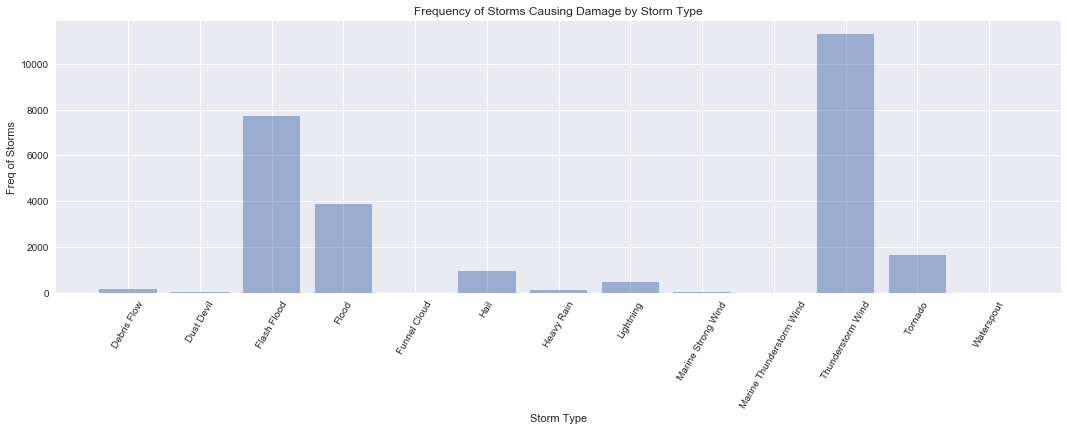

In [13]:
import seaborn as sns
sns.set(color_codes=True)

# storm counts by event type
event_type = np.unique(damage_data['EVENT_TYPE'], return_counts=True)
dim = len(event_type[0])

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(dim), event_type[1], align='center', alpha=0.5)
ax.set_xlim([-1, dim])
ax.set_xticks(range(dim))
ax.set_xticklabels(event_type[0], rotation=60)
ax.set_xlabel('Storm Type')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms Causing Damage by Storm Type')

plt.show()

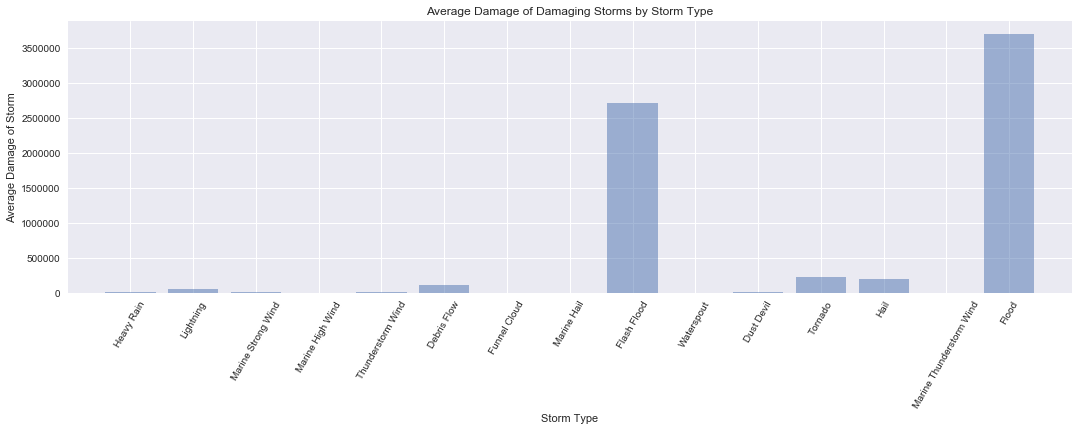

In [14]:
# display average damage per storm type without conditioning on damage causing

sns.set(color_codes=True)

storm_types = list(set(data['EVENT_TYPE'].values))

ave_per_storm = []
for i in range(len(storm_types)):
    storm = storm_types[i]
    storm_damage = data[data['EVENT_TYPE'] == storm]['DAMAGE_PROPERTY']
    ave = np.mean(storm_damage)
    ave_per_storm.append(ave)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(storm_types)), ave_per_storm, align='center', alpha=0.5)
ax.set_xlim([-1, len(storm_types)])
ax.set_xticks(range(len(storm_types)))
ax.set_xticklabels(storm_types, rotation=60)
ax.set_xlabel('Storm Type')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by Storm Type')

plt.show()

### 3.2 Exploring Locational Predictors

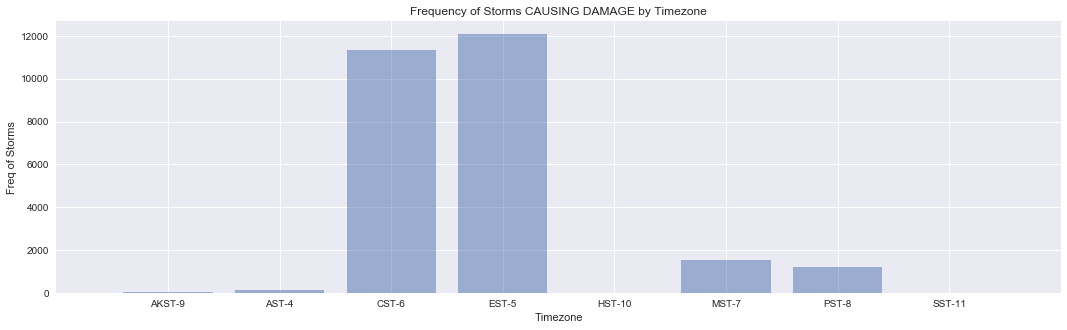

In [15]:
# storm counts by timezone
storm_counts_tz = np.unique(damage_data['CZ_TIMEZONE'], return_counts=True)
dim = len(storm_counts_tz[0])

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(dim), storm_counts_tz[1], align='center', alpha=0.5)
ax.set_xlim([-1, dim])
ax.set_xticks(range(dim))
ax.set_xticklabels(storm_counts_tz[0])
ax.set_xlabel('Timezone')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms CAUSING DAMAGE by Timezone')

plt.show()

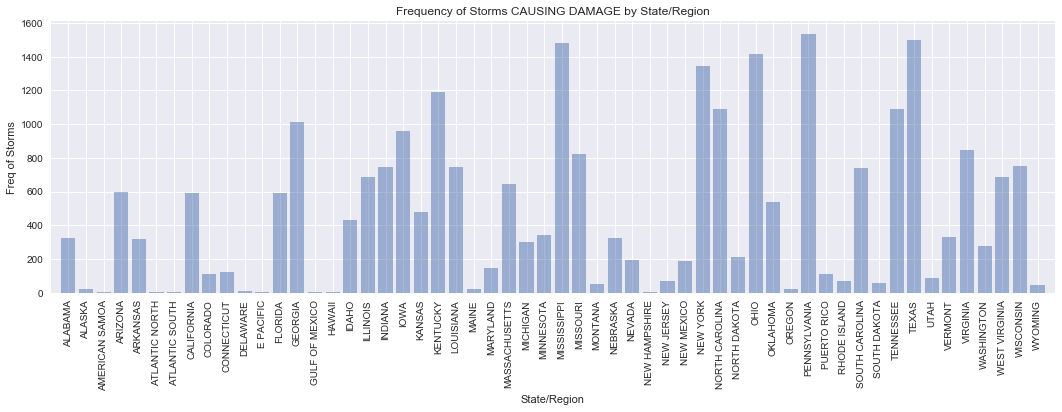

In [16]:
# storm counts by state
storm_counts_st = np.unique(damage_data['STATE'], return_counts=True)
dim = len(storm_counts_st[0])

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(dim), storm_counts_st[1], align='center', alpha=0.5)
ax.set_xlim([-1, dim])
ax.set_xticks(range(dim))
ax.set_xticklabels(storm_counts_st[0], rotation=90)
ax.set_xlabel('State/Region')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms CAUSING DAMAGE by State/Region')

plt.show()

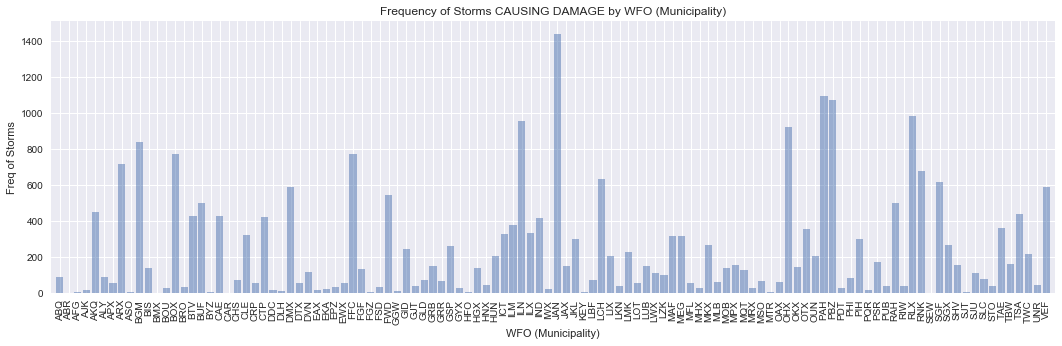

In [17]:
# storm counts by WFO (weather forecast office location)
storm_counts_wfo = np.unique(damage_data['WFO'], return_counts=True)
dim = len(storm_counts_wfo[0])

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(dim), storm_counts_wfo[1], align='center', alpha=0.5)
ax.set_xlim([-1, dim])
ax.set_xticks(range(dim))
ax.set_xticklabels(storm_counts_wfo[0], rotation=90)
ax.set_xlabel('WFO (Municipality)')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms CAUSING DAMAGE by WFO (Municipality)')

plt.show()

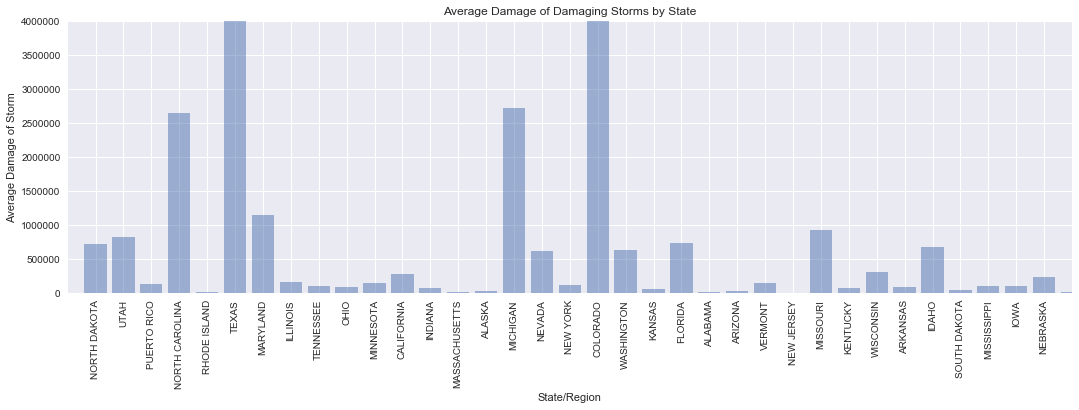

In [18]:
# display average damage per state given causes damage

sns.set(color_codes=True)

states = list(set(damage_data['STATE'].values))

states_final = []
ave_per_state = []
for i in range(len(states)):
    state = states[i]
    state_damage = damage_data[damage_data['STATE'] == state]['DAMAGE_PROPERTY']
    if len(state_damage) > 10:
        ave = np.mean(state_damage)
        states_final.append(state)
        ave_per_state.append(ave)
        
# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(ave_per_state)), ave_per_state, align='center', alpha=0.5)
ax.set_xlim([-1, 35])
ax.set_xticks(range(35))
ax.set_ylim([0,4000000])
ax.set_xticklabels(states_final, rotation=90)
ax.set_xlabel('State/Region')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by State')

plt.show()

### 3.3 Exploring Temporal Predictors

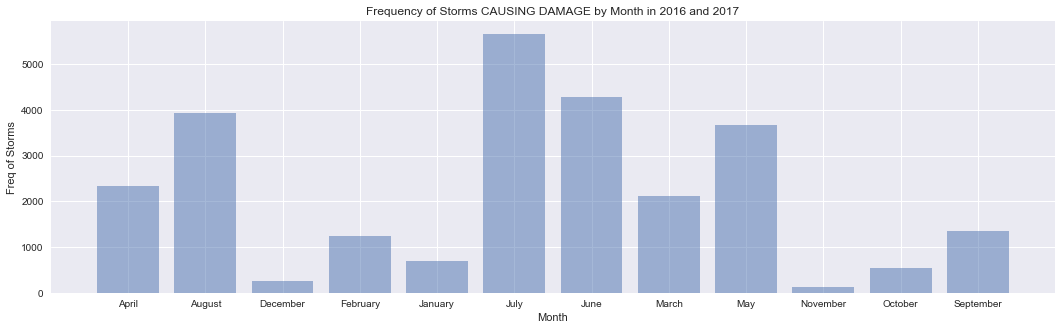

In [19]:
# storm count by month
storm_counts_mo = np.unique(damage_data['MONTH_NAME'], return_counts=True)
dim = len(storm_counts_mo[0])

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(dim), storm_counts_mo[1], align='center', alpha=0.5)
ax.set_xlim([-1, dim])
ax.set_xticks(range(dim))
ax.set_xticklabels(storm_counts_mo[0], rotation=0)
ax.set_xlabel('Month')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms CAUSING DAMAGE by Month in 2016 and 2017')

plt.show()

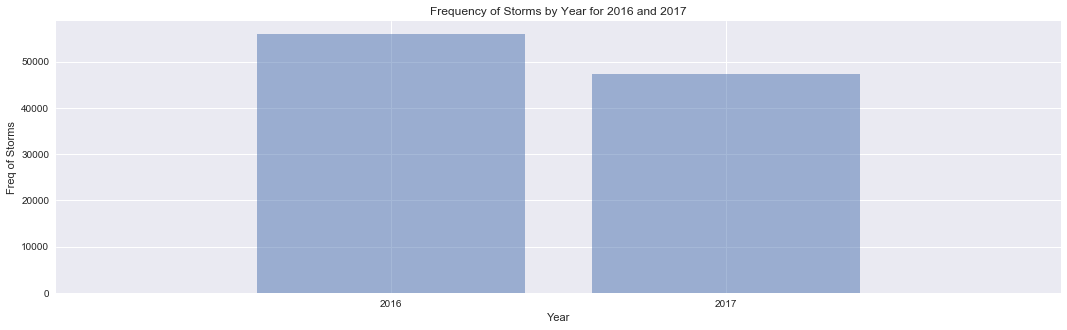

In [20]:
# storm count by year
storm_counts_yr = np.unique(details['YEAR'], return_counts=True)
dim = len(storm_counts_yr[0])

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(dim), storm_counts_yr[1], align='center', alpha=0.5)
ax.set_xlim([-1, dim])
ax.set_xticks(range(dim))
ax.set_xticklabels(storm_counts_yr[0], rotation=0)
ax.set_xlabel('Year')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms by Year for 2016 and 2017')

plt.show()

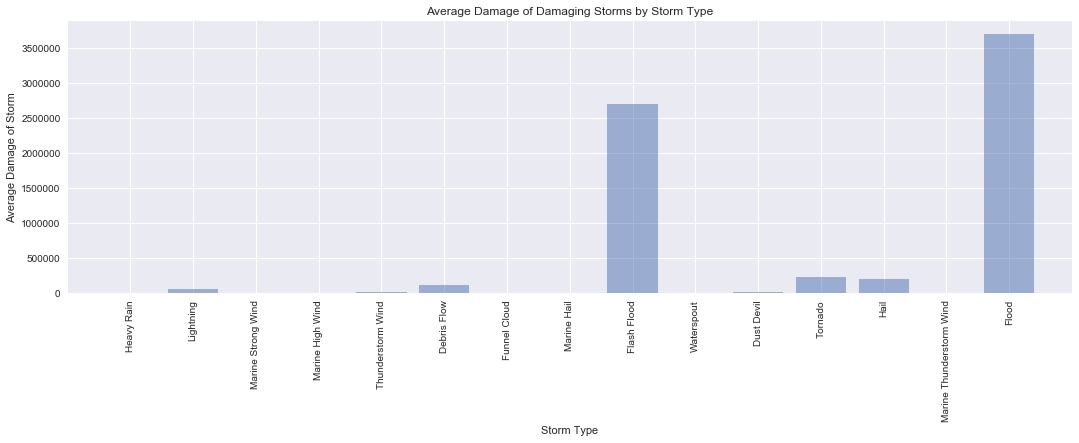

In [21]:
# display average damage per storm type without conditioning on damage causing

sns.set(color_codes=True)

storm_types = list(set(data['EVENT_TYPE'].values))

ave_per_storm = []
for i in range(len(storm_types)):
    storm = storm_types[i]
    storm_damage = data[data['EVENT_TYPE'] == storm]['DAMAGE_PROPERTY']
    ave = np.mean(storm_damage)
    ave_per_storm.append(ave)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(storm_types)), ave_per_storm, align='center', alpha=0.5)
ax.set_xlim([-1, len(storm_types)])
ax.set_xticks(range(len(storm_types)))
ax.set_xticklabels(storm_types, rotation=90)
ax.set_xlabel('Storm Type')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by Storm Type')

plt.show()

# Part 4: More Cleaning and Handling of Nulls

In [22]:
# These are the storms that don't have magnitude
np.unique(data[data.MAGNITUDE.isnull()]["EVENT_TYPE"], return_counts=True)

(array(['Debris Flow', 'Dust Devil', 'Flash Flood', 'Flood', 'Funnel Cloud',
        'Heavy Rain', 'Lightning', 'Tornado', 'Waterspout'], dtype=object),
 array([  626,    18, 22544, 13463,   424,  2232,   570,  2645,   311]))

In [23]:
# drop null rows and check if any null values remaining
# There are alternative ways of addressing this, and future explanation could spend time here.
# In this case, we chose to drop because these variables were important to our analysis
# and we also had a large amount of data that were not missing.

print(data.shape)
# Replace NA magnitudes with 0
data["MAGNITUDE"] = data.MAGNITUDE.fillna(value=0)
data.dropna(inplace=True, subset = ['DAMAGE_CROPS','BEGIN_YEARMONTH', 'YEAR','MAGNITUDE','LOCATION_INDEX', 'RANGE','LATITUDE', 'LONGITUDE'])      
print(data.shape)

# deleted 1500 rows

(75693, 62)
(74161, 62)


### EDA on Our Response Variable

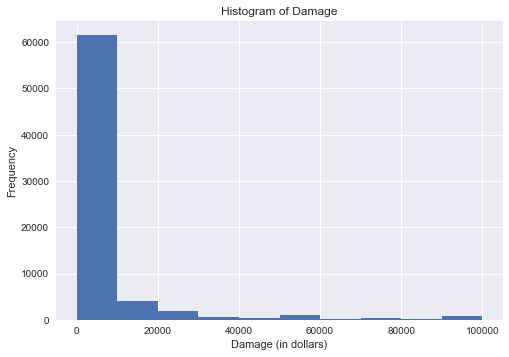

In [24]:
# Plot damage to see the distribution
data["DAMAGE_PROPERTY"] = pd.Series(damage_property)
plt.hist(x=data.DAMAGE_PROPERTY[data.DAMAGE_PROPERTY <= 100000])
plt.xlabel("Damage (in dollars)")
plt.ylabel("Frequency")
plt.title("Histogram of Damage")

In [25]:
np.corrcoef(data["DAMAGE_PROPERTY"],data["DEATHS_DIRECT"])

array([[ 1.        ,  0.53523837],
       [ 0.53523837,  1.        ]])

In [26]:
# Check the quantities of weather events that cause large amounts of damage
data.DAMAGE_PROPERTY[data.DAMAGE_PROPERTY > 100000].shape

(3250,)

In [27]:
import scipy.stats as ss
print("Mean: {}".format(round(np.mean(data.DAMAGE_PROPERTY)),4))
print("Median: {}".format(np.median(data.DAMAGE_PROPERTY)))
print("Skew: {}".format(round(ss.skew(data.DAMAGE_PROPERTY),2)))

Mean: 1516894
Median: 0.0
Skew: 46.4


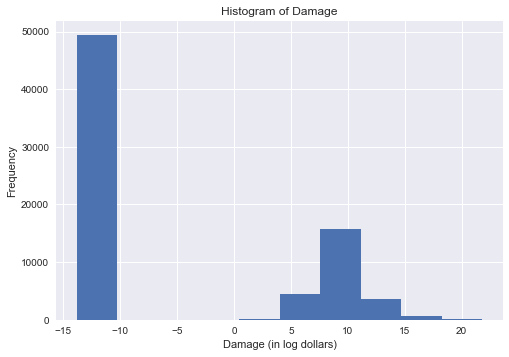

In [28]:
# we see our big concentration at 0, and a (hopefully) near-normal distribution otherwise

plt.hist(x=np.log(data.DAMAGE_PROPERTY + .000001))
plt.xlabel("Damage (in log dollars)")
plt.ylabel("Frequency")
plt.title("Histogram of Damage")

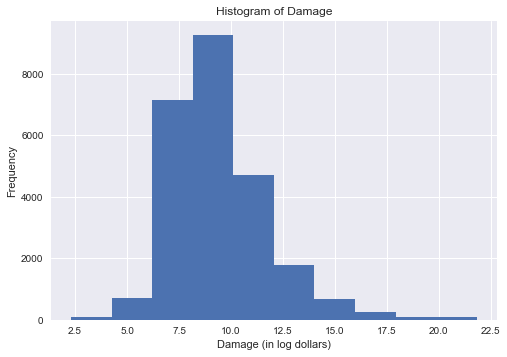

In [29]:
# confirming near-normal response for data with a damage over 0

plt.hist(x=np.log(data.DAMAGE_PROPERTY[data.DAMAGE_PROPERTY>0] + .000001))
plt.xlabel("Damage (in log dollars)")
plt.ylabel("Frequency")
plt.title("Histogram of Damage")

In [30]:
print(len(data))

74161


# Part 5: Zipcode + Demographic Data

In [ ]:
# DON'T RUN AGAIN!!

from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()

def calc_density(row):
    zipcode = search.by_coordinate(row['BEGIN_LAT'], row['BEGIN_LON'], radius=50)
    if (int(row.name) % 1000 == 0):
        print(row.name)
    try: 
        zc = zipcode[0]
        return zc.Density
    except:
        return np.nan

def calc_popul(row):
    zipcode = search.by_coordinate(row['BEGIN_LAT'], row['BEGIN_LON'], radius=50)
    try:
        zc = zipcode[0]
        return zc.Population
    except:
        return np.nan

def calc_wealth(row):
    zipcode = search.by_coordinate(row['BEGIN_LAT'], row['BEGIN_LON'], radius=50)
    try:
        zc = zipcode[0]
        return zc.Wealthy
    except:
        return np.nan

In [ ]:
# DO NOT RUN AGAIN, SINCE WE SAVE TO A CSV BELOW

data['DENSITY'] = data.apply(calc_density, axis=1)
data['POPULATION'] = data.apply(calc_popul, axis=1)
data['HH_INCOME'] = data.apply(calc_wealth, axis=1)

In [ ]:
# DO NOT RUN AGAIN

data.to_csv("model_data_full.csv")

# Part 6: Prepare Predictors + Final Cleaning

In [31]:
data.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID_x', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH',
       'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE', 'YEARMONTH', 'EPISODE_ID_y', 'LOCATION_INDEX', 'RANGE', 'AZIMUTH', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'LAT2', 'LON2', 'HAS_DAMAGE'],
      dtype='object')

In [32]:
data2 = pd.read_csv('model_data_full.csv')
print(len(data2))

# should be the same
print(data.iloc[102]['EVENT_ID'])
print(data2.iloc[102]['EVENT_ID'])

data['DENSITY'] = data2['DENSITY']
data['POPULATION'] = data2['POPULATION']
data['HH_INCOME'] = data2['HH_INCOME']

print(len(data))
# Comment out if needed
data.dropna(inplace=True, subset = ['DENSITY', 'POPULATION', 'HH_INCOME'])  

print(len(data))
data.head()

/Users/evanmackay/Documents/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (35,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


74161
615563
615563
74161
55239


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,YEARMONTH,EPISODE_ID_y,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2,HAS_DAMAGE,DENSITY,POPULATION,HH_INCOME
0,201603,15,2316,201603,15,2316,102911,614969,WISCONSIN,55,2016,March,Hail,C,105,ROCK,MKX,15-MAR-16 23:16:00,CST-6,15-MAR-16 23:16:00,0,0,0,0,0.0,0.00K,Public,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,EDGERTON,1.0,N,EDGERTON,42.8400,-89.0700,42.8400,-89.0700,A deepening low pressure area tracked from Wes...,NaN,CSV,201603,102911,1,0.69,N,EDGERTON,42.8400,-89.0700,4250400,894200,0,141.581601,11512.0,18441.042391
1,201603,15,2239,201603,15,2300,102911,619253,WISCONSIN,55,2016,March,Lightning,C,133,WAUKESHA,MKX,15-MAR-16 22:39:00,CST-6,15-MAR-16 23:00:00,0,0,0,0,1000.0,0.00K,Law Enforcement,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NNE,HARTLAND,1.0,NNE,HARTLAND,43.1069,-88.3468,43.1069,-88.3468,A deepening low pressure area tracked from Wes...,Lightning struck a tree and then traveled into...,CSV,201603,102911,1,0.50,NNE,HARTLAND,43.1069,-88.3468,436414,8820808,1,559.564165,20799.0,31518.731189
2,201607,7,2137,201607,7,2137,108811,651842,KANSAS,20,2016,July,Hail,C,109,LOGAN,GLD,07-JUL-16 21:37:00,CST-6,07-JUL-16 21:37:00,0,0,0,0,0.0,0.00K,Public,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,S,OAKLEY MUNI ARPT,11.0,S,OAKLEY MUNI ARPT,38.9686,-100.8518,38.9686,-100.8518,During the early evening a cold front moved th...,Measured size of the hail was 3.75 inches in d...,CSV,201607,108811,1,10.60,S,OAKLEY MUNI ARPT,38.9686,-100.8518,3858116,10051108,0,5.480869,2544.0,13717.889937
3,201607,7,2013,201607,7,2013,108811,651844,KANSAS,20,2016,July,Thunderstorm Wind,C,193,THOMAS,GLD,07-JUL-16 20:13:00,CST-6,07-JUL-16 20:13:00,0,0,0,0,0.0,0.00K,Mesonet,52.00,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,E,COLBY,2.0,E,COLBY,39.4001,-101.0130,39.4001,-101.0130,During the early evening a cold front moved th...,Estimated time of report from radar.,CSV,201607,108811,1,1.98,E,COLBY,39.4001,-101.0130,3924006,101780,0,13.414206,6502.0,13515.710551
4,201607,7,2116,201607,7,2116,108811,651857,KANSAS,20,2016,July,Hail,C,109,LOGAN,GLD,07-JUL-16 21:16:00,CST-6,07-JUL-16 21:16:00,0,0,0,0,0.0,0.00K,Emergency Manager,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,SSW,OAKLEY MUNI ARPT,6.0,SSW,OAKLEY MUNI ARPT,39.0474,-100.8672,39.0474,-100.8672,During the early evening a cold front moved th...,Golf ball size hail broke rain gauge. Estimat...,CSV,201607,108811,1,5.62,SSW,OAKLEY MUNI ARPT,39.0474,-100.8672,392844,10052032,0,5.480869,2544.0,13717.889937


In [33]:
def getmonth(row):
    return int(str(row["BEGIN_YEARMONTH"])[-2:])

def getyear(row):
    return int(str(row["BEGIN_YEARMONTH"])[:4])

data["MONTH"] = data.apply(getmonth,axis=1)
data["YEAR"] = data.apply(getyear,axis=1)
#data = data.drop(['Unnamed: 0',"BEGIN_YEARMONTH","END_YEARMONTH","LAT2","LON2",
#                  "YEARMONTH","CZ_FIPS","CZ_TYPE","CZ_NAME",
#                  "WFO","MAGNITUDE_TYPE","FLOOD_CAUSE",'CATEGORY', 'TOR_F_SCALE', 
#                  'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
#                  'TOR_OTHER_CZ_FIPS','TOR_OTHER_CZ_NAME',
#                  'EPISODE_NARRATIVE', 'EVENT_NARRATIVE'],axis=1)

In [34]:
data.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID_x', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH',
       'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE', 'YEARMONTH', 'EPISODE_ID_y', 'LOCATION_INDEX', 'RANGE', 'AZIMUTH', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'LAT2', 'LON2', 'HAS_DAMAGE', 'DENSITY', 'POPULATION', 'HH_INCOME', 'MONTH'],
      dtype='object')

In [35]:
X_class = data.drop("HAS_DAMAGE",axis=1)
y_class = data['HAS_DAMAGE']

# drop 3 rows where household income is "infinity"
drop_indices = []
for i in range(len(X_class)):
    if not np.isfinite(X_class['HH_INCOME'].iloc[i]):
        drop_indices.append(i)

X_class = X_class.drop(X_class.index[drop_indices])
y_class = y_class.drop(y_class.index[drop_indices])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.33, random_state=42)

# Part 7: More EDA

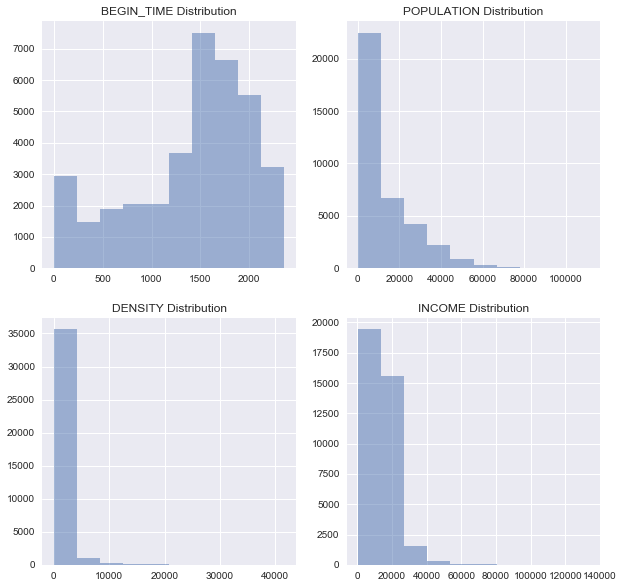

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0,0].hist(X_train['BEGIN_TIME'], alpha=0.5) 
ax[0,0].set_title('BEGIN_TIME Distribution')

ax[0,1].hist(X_train['POPULATION'], alpha=0.5) 
ax[0,1].set_title('POPULATION Distribution')

ax[1,0].hist(X_train['DENSITY'], alpha=0.5) 
ax[1,0].set_title('DENSITY Distribution')

ax[1,1].hist(X_train['HH_INCOME'], alpha=0.5) 
ax[1,1].set_title('INCOME Distribution')

# plt.hist(data['POPULATION'], alpha=0.5)

# Part 8: Preliminary Classification Model

In [39]:
# fit prelim model


print("Num points without damage: " + str(len(data[data['HAS_DAMAGE'] == 0])))
print("Num points with damage: " + str(len(data[data['HAS_DAMAGE'] == 1])))

basic_cols = ['EVENT_TYPE', 'STATE', 'MAGNITUDE', 'CZ_TIMEZONE', 'RANGE', 'LATITUDE', 'LONGITUDE']
X_train_basic = X_train[basic_cols]
X_test_basic = X_test[basic_cols]

X_train_basic = pd.get_dummies(X_train_basic, columns=['EVENT_TYPE', 'STATE', 'CZ_TIMEZONE'], drop_first=True)
X_test_basic = pd.get_dummies(X_test_basic, columns=['EVENT_TYPE', 'STATE', 'CZ_TIMEZONE'], drop_first=True)


model = LogisticRegressionCV(penalty = 'l2')
model.fit(X_train_basic, y_train)
train_pred = model.predict(X_train_basic)
test_pred = model.predict(X_test_basic)

print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = model.predict_proba(X_test_basic)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)

Num points without damage: 36571
Num points with damage: 18668

Training Accuracy: 0.757478314913
Testing Accuracy: 0.762508229098
True Positive Rate:  0.53976339139
True Negative Rate:  0.874155822764
AUC:  0.819725468472


The data contained a ratio of no damage to damage of about 2:1. This is not too far from the ideal case of 1:1 in most classification settings. It was decided that a basic logistic ordinary least squares regression model would be run. What this does is relate the log of the probability of a case having damage to a linear combination of the predictors. This basic model had an accuracy of near 0.75, well above the most naive approach which would have about 66% accuracy if all cases were predicted to not have damage. The model has true negative of 0.86 and true positive of 0.55 and an ROC AUC of .81. An interpretation of this AUC is the probability that a randomly selected case with damage has a higher probability of having damage than a randomly selected case that did not have damage. 

# Part 9: Improving Classification Model

Now that this baseline had been established, the next models were attempted to improve the predictive power of the model. First, more predictors were added to the logistic regression model, such as demographic information about the county where the weather event occurred, such as median household income, population density, and population size. 

In [40]:
# Add interaction between magnitude and event type
# Magnitude is measured in different ways for different types of weather events. 


full_cols = ['BEGIN_TIME', 'STATE', 'MONTH_NAME', 'EVENT_TYPE', 'SOURCE', 'MAGNITUDE', 'BEGIN_RANGE', 
             'RANGE', 'AZIMUTH', 'LATITUDE', 'LONGITUDE', 'DENSITY', 'POPULATION', 'HH_INCOME']
X_train_full = X_train[full_cols]
X_test_full = X_test[full_cols]

X_train_full = pd.get_dummies(X_train_full, columns=['MONTH_NAME','EVENT_TYPE', 'STATE', 'AZIMUTH','SOURCE'], drop_first=True)
X_test_full = pd.get_dummies(X_test_full, columns=['MONTH_NAME','EVENT_TYPE', 'STATE', 'AZIMUTH','SOURCE'], drop_first=True)

s = set(list(X_train_full.columns))
diff = [x for x in list(X_test_full.columns) if x not in s]
print(diff)

X_test_full = X_test_full.drop(labels=diff, axis=1)

print(len(list(X_train_full.columns)))
print(len(list(X_test_full.columns)))



['SOURCE_Lifeguard']
149
149


In [41]:
# fit prelim model

print("Num points without damage: " + str(len(data[data['HAS_DAMAGE'] == 0])))
print("Num points with damage: " + str(len(data[data['HAS_DAMAGE'] == 1])))

model = LogisticRegressionCV(penalty = 'l2')
model.fit(X_train_full, y_train)
train_pred = model.predict(X_train_full)
test_pred = model.predict(X_test_full)

print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = model.predict_proba(X_test_full)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)

Num points without damage: 36571
Num points with damage: 18668

Training Accuracy: 0.697381576459
Testing Accuracy: 0.703533026114
True Positive Rate:  0.259283601709
True Negative Rate:  0.926206555757
AUC:  0.651360708449


## PREDICTOR INTUITION

BEGIN_TIME: time of day could be helpful, helps accuracy. think about duration! (NORMALIZE)

STATE: geographical significance (ONE-HOT) // TAKING OUT

CZ_TYPE: C is county, Z is over water, significant predictor (ONE-HOT)

YEAR: doesn't do a ton, but helps accuracy slightly (ONE-HOT)

MONTH_NAME: EDA showed months correlating with damage frequency (ONE-HOT)

WFO: weather forecast office- another way to break down geographically by main metropolitan areas (ONE-HOT)

EVENT_TYPE: type of storm. highly predictive (ONE-HOT)

LATITUDE: geographical inuition (AS IS) // TAKING OUT

LONGITUDE: geographical inuition (AS IS) // TAKING OUT

AZIMUTH: direction of storm, helps very slightly (ONE-HOT)

DENSITY: helps when normalized, not great (NORMALIZE)

POPULATION: helps when normalized, not great (NORMALIZE)

HH_INCOME: helps when normalized, not great (NORMALIZE)

One-hot encoding counties was not considered due to the possibility of overfitting with so many counties in the USA, but the nearest WFO weather station was recorded as a one-hot encoded set of variables to gain more information on place beyond just state. This model improved over the baseline.

In [108]:

# BETTER SELECTION OF PREDICTORS
full_cols = ['BEGIN_TIME', 'CZ_TYPE', 'YEAR',
             'WFO', 'EVENT_TYPE', 'MONTH_NAME',
             'AZIMUTH', 'DENSITY', 'POPULATION', 'HH_INCOME']#,'MAGNITUDE', 'DENSITY', 'POPULATION', 'HH_INCOME']
X_train_full = X_train[full_cols]
X_test_full = X_test[full_cols]

# normalize the numerical predictors
for i in ['BEGIN_TIME', 'DENSITY', 'POPULATION', 'HH_INCOME']:
    train_mean = X_train_full[i].mean()
    train_sd = X_train_full[i].std()
    X_train_full[i] = (X_train_full[i] - train_mean) / train_sd
    X_test_full[i] = (X_test_full[i] - train_mean) / train_sd

X_train_full = pd.get_dummies(X_train_full, columns=['MONTH_NAME', 'WFO', 'YEAR', 'EVENT_TYPE', 'CZ_TYPE', 'AZIMUTH'], drop_first=True)
X_test_full = pd.get_dummies(X_test_full, columns=['MONTH_NAME', 'WFO', 'YEAR', 'EVENT_TYPE', 'CZ_TYPE', 'AZIMUTH'], drop_first=True)

print(len(list(X_train_full.columns)))
print(len(list(X_test_full.columns)))

s = set(list(X_train_full.columns))
diff = [x for x in list(X_test_full.columns) if x not in s]
print(diff)

X_test_full = X_test_full.drop(labels=diff, axis=1)

print(len(list(X_train_full.columns)))
print(len(list(X_test_full.columns)))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


165
166
['WFO_REV']
165
165


In [109]:
print("Num points without damage: " + str(len(data[data['HAS_DAMAGE'] == 0])))
print("Num points with damage: " + str(len(data[data['HAS_DAMAGE'] == 1])))

model = LogisticRegressionCV(penalty = 'l2')
model.fit(X_train_full, y_train)

train_pred = model.predict(X_train_full)
test_pred = model.predict(X_test_full)

print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = model.predict_proba(X_test_full)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)

Num points without damage: 36571
Num points with damage: 18668

Training Accuracy: 0.822438998027
Testing Accuracy: 0.82005705508
True Positive Rate:  0.696845218534
True Negative Rate:  0.881815186954
AUC:  0.888859722607


## ADDING COMPLEX EFFECTS

Next, complex effects were added such as interaction terms. The “Magnitude” of the weather event means different things for different types of weather events; for a hail storm, it is the size of the hail, for a thunderstorm it might be the maximum sustained wind, etc. To address this, the interactions of the variable magnitude and the one-hot encoded weather event types were included in the model. Pairwise interactions between income, population density, and population were also included. The predictive power increased dramatically.

In [178]:
import copy

# MAKE SURE INTERACTION BETWEEN MAGNITUDE AND EVENT TYPE
X_train_complex = copy.deepcopy(X_train_full)
X_test_complex = copy.deepcopy(X_test_full)


# hardcode interaction term
for event_type in ['EVENT_TYPE_Dust Devil', 'EVENT_TYPE_Flash Flood', 'EVENT_TYPE_Flood', 
            'EVENT_TYPE_Funnel Cloud', 'EVENT_TYPE_Hail', 'EVENT_TYPE_Heavy Rain', 
            'EVENT_TYPE_Lightning', 'EVENT_TYPE_Marine Hail', 'EVENT_TYPE_Marine High Wind', 
            'EVENT_TYPE_Marine Strong Wind', 'EVENT_TYPE_Marine Thunderstorm Wind', 
            'EVENT_TYPE_Thunderstorm Wind', 'EVENT_TYPE_Tornado', 'EVENT_TYPE_Waterspout']:
    X_train_complex[event_type + "*MAGNITUDE"] = X_train_complex[event_type]*X_train["MAGNITUDE"]
    X_test_complex[event_type + "*MAGNITUDE"] = X_test_complex[event_type]*X_test["MAGNITUDE"]
    
X_train_complex["HH_INCOME*DENSITY"] = X_train_complex["DENSITY"]*X_train_complex["HH_INCOME"]
X_train_complex["HH_INCOME*POPULATION"] = X_train_complex["POPULATION"]*X_train_complex["HH_INCOME"]
X_train_complex["DENSITY*POPULATION"] = X_train_complex["POPULATION"]*X_train_complex["DENSITY"]
X_test_complex["HH_INCOME*DENSITY"] = X_test_complex["DENSITY"]*X_test_complex["HH_INCOME"]
X_test_complex["HH_INCOME*POPULATION"] = X_test_complex["POPULATION"]*X_test_complex["HH_INCOME"]
X_test_complex["DENSITY*POPULATION"] = X_test_complex["POPULATION"]*X_test_complex["DENSITY"]   

X_train_complex.describe()

,BEGIN_TIME,DENSITY,POPULATION,HH_INCOME,MONTH_NAME_August,MONTH_NAME_December,MONTH_NAME_February,MONTH_NAME_January,MONTH_NAME_July,MONTH_NAME_June,MONTH_NAME_March,MONTH_NAME_May,MONTH_NAME_November,MONTH_NAME_October,MONTH_NAME_September,WFO_ABR,WFO_AFG,WFO_AJK,WFO_AKQ,WFO_ALY,WFO_AMA,WFO_APX,WFO_ARX,WFO_ASO,WFO_BGM,WFO_BIS,WFO_BMX,WFO_BOI,WFO_BOU,WFO_BOX,WFO_BRO,WFO_BTV,WFO_BUF,WFO_BYZ,WFO_CAE,WFO_CAR,WFO_CHS,WFO_CLE,WFO_CRP,WFO_CTP,WFO_CYS,WFO_DDC,WFO_DLH,WFO_DMX,WFO_DTX,WFO_DVN,WFO_EAX,WFO_EKA,WFO_EPZ,WFO_EWX,...,WFO_UNR,WFO_VEF,YEAR_2017,EVENT_TYPE_Dust Devil,EVENT_TYPE_Flash Flood,EVENT_TYPE_Flood,EVENT_TYPE_Funnel Cloud,EVENT_TYPE_Hail,EVENT_TYPE_Heavy Rain,EVENT_TYPE_Lightning,EVENT_TYPE_Marine Hail,EVENT_TYPE_Marine High Wind,EVENT_TYPE_Marine Strong Wind,EVENT_TYPE_Marine Thunderstorm Wind,EVENT_TYPE_Thunderstorm Wind,EVENT_TYPE_Tornado,EVENT_TYPE_Waterspout,CZ_TYPE_Z,AZIMUTH_ENE,AZIMUTH_ESE,AZIMUTH_N,AZIMUTH_NE,AZIMUTH_NNE,AZIMUTH_NNW,AZIMUTH_NW,AZIMUTH_S,AZIMUTH_SE,AZIMUTH_SSE,AZIMUTH_SSW,AZIMUTH_SW,AZIMUTH_W,AZIMUTH_WNW,AZIMUTH_WSW,EVENT_TYPE_Dust Devil*MAGNITUDE,EVENT_TYPE_Flash Flood*MAGNITUDE,EVENT_TYPE_Flood*MAGNITUDE,EVENT_TYPE_Funnel Cloud*MAGNITUDE,EVENT_TYPE_Hail*MAGNITUDE,EVENT_TYPE_Heavy Rain*MAGNITUDE,EVENT_TYPE_Lightning*MAGNITUDE,EVENT_TYPE_Marine Hail*MAGNITUDE,EVENT_TYPE_Marine High Wind*MAGNITUDE,EVENT_TYPE_Marine Strong Wind*MAGNITUDE,EVENT_TYPE_Marine Thunderstorm Wind*MAGNITUDE,EVENT_TYPE_Thunderstorm Wind*MAGNITUDE,EVENT_TYPE_Tornado*MAGNITUDE,EVENT_TYPE_Waterspout*MAGNITUDE,HH_INCOME*DENSITY,HH_INCOME*POPULATION,DENSITY*POPULATION
count,3.700700e+04,3.700700e+04,3.700700e+04,3.700700e+04,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,...,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.0,37007.0,37007.0,37007.0,37007.000000,37007.0,37007.0,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.0,37007.0,37007.000000,37007.000000,37007.000000
mean,-1.224344e-16,-1.791354e-15,6.249673e-17,6.871062e-15,0.115708,0.014376,0.061799,0.026779,0.113519,0.174372,0.092847,0.174075,0.008701,0.023104,0.061394,0.005323,0.000243,0.000459,0.015375,0.003513,0.005756,0.001919,0.032021,0.000081,0.006972,0.008593,0.004837,0.001324,0.001000,0.016375,0.002189,0.005512,0.005810,0.002162,0.006215,0.000757,0.003162,0.005080,0.003702,0.007917,0.001567,0.003729,0.000486,0.026779,0.003918,0.007215,0.014349,0.000811,0.002432,0.008215,...,0.008242,0.007998,0.432918,0.000270,0.279163,0.192018,0.006080,0.155916,0.028778,0.006080,0.000649,0.000892,0.000162,0.029940,0.252493,0.034723,0.004134,0.035777,0.049099,0.048748,0.160672,0.056584,0.046937,0.047910,0.060232,0.070365,0.057989,0.047478,0.046451,0.056179,0.078282,0.046640,0.049180,0.0,0.0,0.0,0.0,0.185112,0.0,0.0,0.000686,0.047640,0.006242,1.192531,13.539411,0.0,0.0,0.229013,0.204578,0.376362
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.319879,0.119035,0.240794,0.161438,0.317231,0.379435,0.290222,0.379179,0.092874,0.150235,0.240054,0.072768,0.015593,0.021428,0.123043,0.059166,0.075648,0.043760,0.176058,0.009003,0.083206,0.0

In [111]:
model = LogisticRegressionCV(penalty = 'l2')
model.fit(X_train_complex, y_train)
train_pred = model.predict(X_train_complex)
test_pred = model.predict(X_test_complex)

print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = model.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.825627583971
Testing Accuracy: 0.822525784507
True Positive Rate:  0.700460072297
True Negative Rate:  0.883709438313
AUC:  0.895981968602


## k-NN

Next, the model building process pivoted direction; now instead of manipulating the predictors, the same predictors were used but for other families of models. A k-NN procedure was carried out which achieved strong predictive power on the test set. This k-NN approach is helpful because it does not assume anything about the underlying distribution of the responses and the how the data are related to each other, whereas logistic regression assumes that variables are evenly spread throughout predicted value (homoskedasticity) and that there is a linear relationship between the log odds of the probability of having damage and the predictors.

In [112]:
# max_score = 0
# max_k = 0 

# for k in range(15,31,3):
#     knn = KNeighborsClassifier(n_neighbors = k)
#     score = cross_val_score(knn,X_train_complex,y_train).mean()
#     if score > max_score:
#         max_k = k
#         max_score = score
# print(max_k)
max_k = 15

In [113]:
model_knn = KNeighborsClassifier(n_neighbors = max_k)
model_knn.fit(X_train_complex, y_train)
train_pred = model_knn.predict(X_train_complex)
test_pred = model_knn.predict(X_test_complex)

print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = model_knn.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.845191450266
Testing Accuracy: 0.819398727233
True Positive Rate:  0.648044692737
True Negative Rate:  0.905287432054
AUC:  0.892345834994


### LDA/QDA


Quadratic discriminant analysis and linear discriminant analysis were also completed, which relax some of the modeling assumptions of logistic regression. These did not improve the model. 

In [114]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_complex,y_train)

train_pred = lda.predict(X_train_complex)
test_pred = lda.predict(X_test_complex)
print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = lda.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.817710162942
Testing Accuracy: 0.815009874918
True Positive Rate:  0.685179099573
True Negative Rate:  0.880085653105
AUC:  0.887339143988


/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [115]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_complex,y_train)

train_pred = qda.predict(X_train_complex)
test_pred = qda.predict(X_test_complex)
print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = qda.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)

/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Training Accuracy: 0.435917529116
Testing Accuracy: 0.426541584376
True Positive Rate:  0.998849819257
True Negative Rate:  0.139680448032
AUC:  0.570115501996


### Random Forest/Decision Trees

Next, decision trees were implemented. These are very interpretable because predictions can be achieved by following a tree of binary decisions related to predictors. The tree ended up being pretty deep with 82 predictors. Although this might increase worries of overfitting the data, because this value was chosen via cross validation in that it was selected based on performance on data that the model did not see during training, there is less concern about overfitting for the classification tree.

In [116]:
best_score = 0
best_depth = 0
for i in range(80,95):
    dt = DecisionTreeClassifier(max_depth=i)
    # Perform 5-fold cross validation 
    score = cross_val_score(estimator=dt, X=X_train_complex, y=y_train, cv=5, n_jobs=-1).mean()
    if score > best_score:
        best_score = score
        best_depth = i

In [117]:
best_depth

82

In [ ]:
# GRAPH

In [118]:
dt = DecisionTreeClassifier(max_depth=best_depth)
dt.fit(X_train_complex,y_train)

train_pred = dt.predict(X_train_complex)
test_pred = dt.predict(X_test_complex)
print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = dt.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.997703137244
Testing Accuracy: 0.898398068905
True Positive Rate:  0.852776864936
True Negative Rate:  0.921265030473
AUC:  0.885129429909


In [213]:
# TODO: GINI IMPORTANCE FOR DECISION TREE
treeimportance_df = pd.DataFrame(columns=["Predictor","Importance"])
treeimportance_df["Importance"] = pd.Series(dt.feature_importances_)
treeimportance_df["Predictor"] = pd.Series(X_train_complex.columns)
treeimportance_df.sort_values('Importance',ascending=False)[:30]

,Predictor,Importance
176,EVENT_TYPE_Thunderstorm Wind*MAGNITUDE,0.108599
0,BEGIN_TIME,0.083302
169,EVENT_TYPE_Hail*MAGNITUDE,0.040545
180,HH_INCOME*POPULATION,0.031703
1,DENSITY,0.030501
2,POPULATION,0.029380
73,WFO_JAN,0.029380
181,DENSITY*POPULATION,0.029130
179,HH_INCOME*DENSITY,0.026795
3,HH_INCOME,0.024981


#### TODO: GRIDSEARCHCV

The next step was a random forest. Random forest is a process that averages predictions from many individually weak decision trees that are usually shorter in depth and might only be trained on a random subset of predictors. Although initially the same depth from the decision tree was used, eventually it was decided that it is better in random forest to include weaker individual predictions and average over these. The random forest achieved large increases in predictive power. The importance of predictors was also considered; thunderstorm wind speed magnitude was an important predictor which is unsurprising, as well as population density, population, hail size, and income. 

In [182]:
param_grid_rf = {
    'max_features': [20,40,60,80],
    'max_depth': [5,20,35,50],
    'n_estimators': [32,64] 
}
rfb = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(rfb, param_grid_rf, cv=5, n_jobs=-1)

rf_cv.fit(X_train_complex, y_train)

train_pred = rf_cv.predict(X_train_complex)
test_pred = rf_cv.predict(X_test_complex)
print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = rf_cv.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.975383035642
Testing Accuracy: 0.911016019311
True Positive Rate:  0.828951692409
True Negative Rate:  0.952149563499
AUC:  0.961209723443


In [121]:
# Out-of-bag cross-validation to choose RF number of predictors
#from sklearn.ensemble import RandomForestClassifier
#best_pred = 0
#best_score = 0
#for f in [20,40,60,80]:
    est = RandomForestClassifier(oob_score=True, 
                                n_estimators=32, max_features=f, max_depth=best_depth, n_jobs=-1)
    est.fit(X_train_complex, y_train)
    if est.oob_score_ > best_score:
        best_score = est.oob_score_
        best_pred = f

In [122]:
#rf = RandomForestClassifier(oob_score=True, n_estimators=64, max_features=best_pred, 
                            max_depth=best_depth, n_jobs=-1)
#rf.fit(X_train_complex,y_train)

#train_pred = rf.predict(X_train_complex)
#test_pred = rf.predict(X_test_complex)
#print()
#print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
#print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

#from sklearn.metrics import confusion_matrix
#conf_mat = confusion_matrix(y_test,test_pred)
#print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
#print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

#test_pred_proba = rf.predict_proba(X_test_complex)[:,1]
#fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
#roc_auc = metrics.auc(fpr, tpr)
#print("AUC: ", roc_auc)


Training Accuracy: 0.999459561705
Testing Accuracy: 0.922207592715
True Positive Rate:  0.866086099244
True Negative Rate:  0.950337670894
AUC:  0.970694336808


In [211]:
treeimportance_rf = pd.DataFrame(columns=["Predictor","Importance"])
treeimportance_rf["Importance"] = pd.Series(rf.feature_importances_)
treeimportance_rf["Predictor"] = pd.Series(X_train_complex.columns)
treeimportance_rf.sort_values('Importance',ascending=False)[:29]

,Predictor,Importance
176,EVENT_TYPE_Thunderstorm Wind*MAGNITUDE,0.070458
0,BEGIN_TIME,0.067579
1,DENSITY,0.034630
181,DENSITY*POPULATION,0.033956
2,POPULATION,0.033584
169,EVENT_TYPE_Hail*MAGNITUDE,0.033303
180,HH_INCOME*POPULATION,0.032909
3,HH_INCOME,0.032070
179,HH_INCOME*DENSITY,0.030870
73,WFO_JAN,0.029390


### AdaBoost

An ada-boost method was also conducted. This is an iterative process which builds decision trees on the residuals of earlier, weaker model in order to improve prediction. This process improved predictive power over the logistic regression. 

In [123]:
# TODO: 15 MAX_DEPTH ???
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
param_grid_boost = {
              'base_estimator__max_depth': list(range(5,16,2))
}
gb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150, learning_rate=.08)
gb_cv = GridSearchCV(gb, param_grid_boost, cv=5, n_jobs=-1)

gb_cv.fit(X_train_complex, y_train)

begb = gb_cv.best_estimator_
begb

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.08, n_estimators=150, random_state=None)

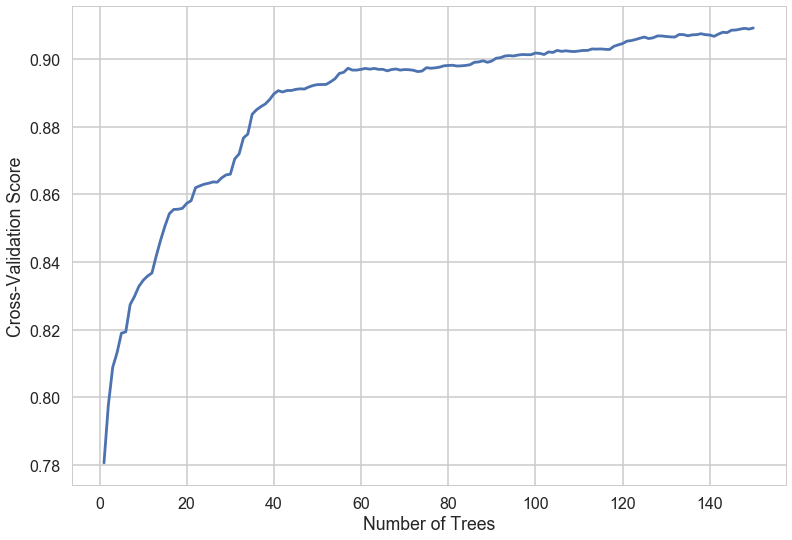

In [124]:
test_scores=[]
for spred in begb.staged_predict(X_test_complex):
    test_scores.append(metrics.accuracy_score(spred, y_test))
plt.plot(range(1, 151), test_scores)
plt.xlabel("Number of Trees")
plt.ylabel("Cross-Validation Score")

In [127]:
print ("Optimal # trees = ", np.argmax(test_scores))
print ("Optimal depth = ", 15) # from begb printout above

Optimal # trees =  149
Optimal depth =  15


In [128]:
gb_optimized = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9),
                                  n_estimators=149, learning_rate=.08)
gb_optimized.fit(X_train_complex, y_train)

train_pred = gb_optimized.predict(X_train_complex)
test_pred = gb_optimized.predict(X_test_complex)
print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = gb_optimized.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.990947658551
Testing Accuracy: 0.900811937678
True Positive Rate:  0.821229050279
True Negative Rate:  0.94070169659
AUC:  0.940525151682


# Part 10: Preliminary Regression Model

Beyond classifying whether or not there is damage to something, there is also interest in predicting the dollar amount of damage. Because this amount is very right skewed in the data, a log transformation was conducted and models were run to predict this log transformed variable. Using the same predictors chosen from logistic regression classification, a basic ordinary least squares regression model yielded a R^2 of 0.43 in the testing set. 

In [189]:
# Re-handle data for regression problem

print(len(data))
non_null_data = data.dropna(axis=0, subset=['DAMAGE_PROPERTY'], how='any')
print(len(non_null_data))
damage_data = non_null_data[non_null_data['DAMAGE_PROPERTY'] > 1.0]
# expecting ~18000
print(len(damage_data))

X = damage_data.drop('DAMAGE_PROPERTY',axis=1)
y = damage_data['DAMAGE_PROPERTY']

# drop 3 rows where household income is "infinity"
drop_indices = []
for i in range(len(X)):
    if not np.isfinite(X['HH_INCOME'].iloc[i]):
        drop_indices.append(i)

print(len(X))
X = X.drop(X.index[drop_indices])
y = y.drop(y.index[drop_indices])
print(len(X))

X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.33, random_state=42)

55239
55239
18668
18668
18664


In [190]:
# BETTER SELECTION OF PREDICTORS
full_cols = ['BEGIN_TIME', 'CZ_TYPE', 'YEAR',
             'WFO', 'EVENT_TYPE', 'MONTH_NAME',
             'AZIMUTH', 'DENSITY', 'POPULATION', 'HH_INCOME']
X_train_reg = X_train[full_cols]
X_test_reg = X_test[full_cols]

# normalize the numerical predictors
for i in ['BEGIN_TIME', 'DENSITY', 'POPULATION', 'HH_INCOME']:
    train_mean = X_train_reg[i].mean()
    train_sd = X_train_reg[i].std()
    X_train_reg[i] = (X_train_reg[i] - train_mean) / train_sd
    X_test_reg[i] = (X_test_reg[i] - train_mean) / train_sd

X_train_reg = pd.get_dummies(X_train_reg, columns=['MONTH_NAME', 'WFO', 'YEAR', 'EVENT_TYPE', 'CZ_TYPE', 'AZIMUTH'], drop_first=True)
X_test_reg = pd.get_dummies(X_test_reg, columns=['MONTH_NAME', 'WFO', 'YEAR', 'EVENT_TYPE', 'CZ_TYPE', 'AZIMUTH'], drop_first=True)

#print(len(list(X_train_reg.columns)))
#print(len(list(X_test_reg.columns)))

s = set(list(X_train_reg.columns))
diff = [x for x in list(X_test_reg.columns) if x not in s]

X_test_reg = X_test_reg.drop(labels=diff, axis=1)

s = set(list(X_test_reg.columns))
diff = [x for x in list(X_train_reg.columns) if x not in s]

X_train_reg = X_train_reg.drop(labels=diff, axis=1)

#print(len(list(X_train_reg.columns)))
#print(len(list(X_test_reg.columns)))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [191]:
y_train2 = np.log(y_train_reg)
y_test2 = np.log(y_test_reg)

model_base = LinearRegression()
model_base.fit(X_train_reg, y_train2)

train_pred = model_base.predict(X_train_reg)
test_pred = model_base.predict(X_test_reg)

print()
print("Training R^2: " + str(model_base.score(X_train_reg,y_train2)))
print("Testing R^2: " + str(model_base.score(X_test_reg,y_test2)))


Training Accuracy: 0.431650202073
Testing Accuracy: 0.431797688817


# Part 11:  Improving Regression Model

Once interaction terms were included, using the same interactions from the classification problem, the R^2 increased to 0.46. 

In [192]:
X_train_reg_complex = copy.deepcopy(X_train_reg)
X_test_reg_complex = copy.deepcopy(X_test_reg)


# hardcode interaction term
for event_type in ['EVENT_TYPE_Dust Devil', 'EVENT_TYPE_Flash Flood', 'EVENT_TYPE_Flood', 'EVENT_TYPE_Hail', 
                   'EVENT_TYPE_Heavy Rain', 'EVENT_TYPE_Lightning', 'EVENT_TYPE_Marine Strong Wind',
       'EVENT_TYPE_Thunderstorm Wind', 'EVENT_TYPE_Tornado', 'EVENT_TYPE_Waterspout']:
    X_train_reg_complex[event_type + "*MAGNITUDE"] = X_train_reg_complex[event_type]*X_train["MAGNITUDE"]
    X_test_reg_complex[event_type + "*MAGNITUDE"] = X_test_reg_complex[event_type]*X_test["MAGNITUDE"]
    
X_train_reg_complex["HH_INCOME*DENSITY"] = X_train_reg_complex["DENSITY"]*X_train_reg_complex["HH_INCOME"]
X_train_reg_complex["HH_INCOME*POPULATION"] = X_train_reg_complex["POPULATION"]*X_train_reg_complex["HH_INCOME"]
X_train_reg_complex["DENSITY*POPULATION"] = X_train_reg_complex["POPULATION"]*X_train_reg_complex["DENSITY"]
X_test_reg_complex["HH_INCOME*DENSITY"] = X_test_reg_complex["DENSITY"]*X_test_reg_complex["HH_INCOME"]
X_test_reg_complex["HH_INCOME*POPULATION"] = X_test_reg_complex["POPULATION"]*X_test_reg_complex["HH_INCOME"]
X_test_reg_complex["DENSITY*POPULATION"] = X_test_reg_complex["POPULATION"]*X_test_reg_complex["DENSITY"]

for quant in ['BEGIN_TIME', 'DENSITY', 'POPULATION', 'HH_INCOME']:
    X_train_reg_complex[quant + "2"] = (X_train_reg_complex[quant]) ** 2
    X_test_reg_complex[quant + "2"] = (X_test_reg_complex[quant]) ** 2

In [193]:
model_complex = LinearRegression()
model_complex.fit(X_train_reg_complex, y_train2)

train_pred = model_complex.predict(X_train_reg_complex)
test_pred = model_complex.predict(X_test_reg_complex)

print("Training Accuracy: " + str(model_complex.score(X_train_reg_complex,y_train2)))
print("Testing Accuracy: " + str(model_complex.score(X_test_reg_complex,y_test2)))

Training Accuracy: 0.474418140789
Testing Accuracy: 0.469550842239


In [194]:
diff = abs(test_pred - y_test2)
diffs = []
for i in diff:
    diffs.append(math.exp(i))
print("Mean Absolute Value Error: {}".format(np.mean(diffs)))
print("SD Absolute Value Error: {}".format(np.std(diffs)))

Mean Absolute Value Error: 41.04277796222084
SD Absolute Value Error: 1436.011567378967


In [230]:
coefs_df = pd.DataFrame(columns=["Predictor","Coefficient"])
coefs_df["Coefficient"] = pd.Series(model_complex.coef_)
coefs_df["Predictor"] = pd.Series(X_train_reg_complex.columns)
coefs_df.sort_values('Coefficient',ascending=False)[:25]

,Predictor,Coefficient
123,EVENT_TYPE_Marine Strong Wind,16.546230
87,WFO_MTR,4.914637
69,WFO_LIX,4.736614
39,WFO_EKA,3.065546
125,EVENT_TYPE_Tornado,2.314434
68,WFO_LCH,1.999657
13,MONTH_NAME_October,1.953874
146,EVENT_TYPE_Hail*MAGNITUDE,1.901404
118,EVENT_TYPE_Flash Flood,1.661344
119,EVENT_TYPE_Flood,1.547499


In [228]:
print(coefs_df[coefs_df["Predictor"]=="POPULATION"])
print(coefs_df[coefs_df["Predictor"]=="DENSITY"])
print(coefs_df[coefs_df["Predictor"]=="DENSITY2"])
print(coefs_df[coefs_df["Predictor"]=="HH_INCOME"])
print(coefs_df[coefs_df["Predictor"]=="HH_INCOME2"])

    Predictor  Coefficient
2  POPULATION     0.012939
  Predictor  Coefficient
1   DENSITY    -0.031599
    Predictor  Coefficient
157  DENSITY2    -0.006742
   Predictor  Coefficient
3  HH_INCOME    -0.005024
      Predictor  Coefficient
159  HH_INCOME2     0.000229


This model was then evaluated for whether it is violating assumptions of ordinary least squares regression. The residuals were plotted to see if they were approximately Normal. Then, residuals were plotted against fitted values. This does not appear to be evenly scattered, but this is not especially concerning because given the discreteness of the problem and the fact that damage is nonnegative. Predicted values were also plotted against observed values. 

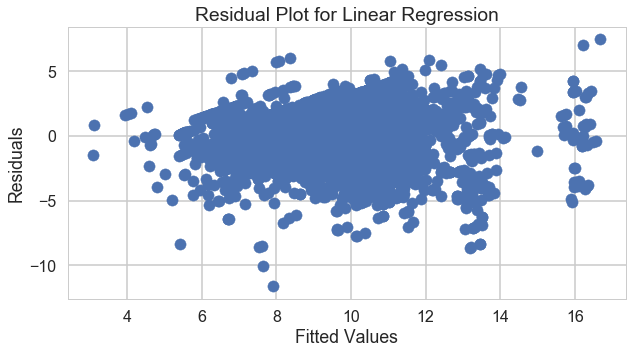

In [195]:
plt.figure(figsize=(10,5))
plt.title("Residual Plot for OLS")
plt.scatter(test_pred,test_pred - y_test2,marker='o')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

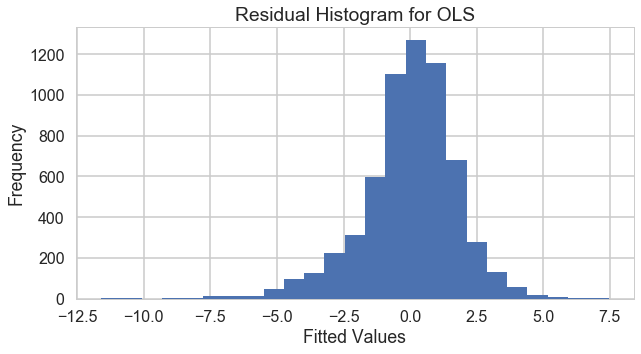

In [198]:
plt.figure(figsize=(10,5))
plt.title("Residual Histogram for OLS")
plt.hist(test_pred - y_test2,bins=25)
plt.xlabel("Fitted Values")
plt.ylabel("Frequency")

### Regularization

In [76]:
lambdas = [.001,.005,1,5,10,50,100,500,1000]
ridge = RidgeCV(cv=5, alphas=lambdas, fit_intercept=True, normalize=True)
ridge.fit(X_train_reg_complex,y_train2)

print("Training Accuracy: " + str(ridge.score(X_train_reg_complex,y_train2)))
print("Testing Accuracy: " + str(ridge.score(X_test_reg_complex,y_test2)))

Training Accuracy: 0.473769508663
Testing Accuracy: 0.469292299256


In [77]:
lasso = LassoCV(cv=5, alphas=lambdas, fit_intercept=True, normalize=True)
lasso.fit(X_train_reg_complex,y_train2)

print("Training Accuracy: " + str(lasso.score(X_train_reg_complex,y_train2)))
print("Testing Accuracy: " + str(lasso.score(X_test_reg_complex,y_test2)))

Training Accuracy: 0.3337052492
Testing Accuracy: 0.328269072598


### k-NN

In [80]:
knn_reg = KNeighborsRegressor(n_neighbors=15)
knn_reg.fit(X_train_reg_complex,y_train2)

print("Training Accuracy: " + str(knn_reg.score(X_train_reg_complex,y_train2)))
print("Testing Accuracy: " + str(knn_reg.score(X_test_reg_complex,y_test2)))

Training Accuracy: 0.526442438159
Testing Accuracy: 0.44326243361


### Random Forest Regressor

In [164]:
# code from 
# Adventures in scikit-learn's Random Forest by Gregory Saunders
from itertools import product
from collections import OrderedDict
param_dict = OrderedDict(
    n_estimators = [300, 375, 450],
    max_features = [0.2, 0.5, 0.8]
)

param_dict.values()

odict_values([[300, 375, 450], [0.2, 0.5, 0.8]])

In [165]:
from sklearn.ensemble import RandomForestRegressor
results = {}
estimators= {}
# Iterates through all possible combinations of n and f
for n, f in product(*param_dict.values()):
    params = (n, f)
    # n_jobs = -1 --> parallelism which does exactly how many cores your computer has
    est2 = RandomForestRegressor(oob_score=True, 
                                n_estimators=n, max_features=f, n_jobs=-1)
    est2.fit(X_train_reg_complex, y_train2)
    results[params] = est2.oob_score_
    estimators[params] = est2
outparams = max(results, key = results.get)
outparams

(450, 0.5)

In [166]:
rf_reg = estimators[outparams]

print("Training Accuracy: " + str(rf_reg.score(X_train_reg_complex,y_train2)))
print("Testing Accuracy: " + str(rf_reg.score(X_test_reg_complex,y_test2)))

Training Accuracy: 0.968901575735
Testing Accuracy: 0.772632883999


In [209]:
treeimportance_rf = pd.DataFrame(columns=["Predictor","Importance"])
treeimportance_rf["Importance"] = pd.Series(rf_reg.feature_importances_)
treeimportance_rf["Predictor"] = pd.Series(X_train_reg_complex.columns)
treeimportance_rf.sort_values('Importance',ascending=False)[:29]

,Predictor,Importance
150,EVENT_TYPE_Thunderstorm Wind*MAGNITUDE,0.083440
156,BEGIN_TIME2,0.066804
69,WFO_LIX,0.064016
0,BEGIN_TIME,0.062736
68,WFO_LCH,0.062308
124,EVENT_TYPE_Thunderstorm Wind,0.037065
57,WFO_ICT,0.026976
4,MONTH_NAME_August,0.025330
159,HH_INCOME2,0.024817
1,DENSITY,0.024121
